In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

Data Exploration

The dataset is salary data from jobs within Data Science from the years 2020 - 2023

https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

In [103]:
data = pd.read_csv('jobs_in_data.csv')
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [104]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


No empty values or 0 found in the dataset

In [106]:
empty_values = data.isnull().sum().sum()

zeros_values = (data == 0).sum().sum()

if empty_values > 0:
    print("There are empty values in the dataset.")
    print("Number of empty values:", empty_values)
else:
    print("There are no empty values in the dataset.")

if zeros_values > 0:
    print("There are zero values in the dataset.")
    print("Number of zero values:", zeros_values)
else:
    print("There are no zero values in the dataset.")

There are no empty values in the dataset.
There are no zero values in the dataset.


Trying to find outliers in the dataset

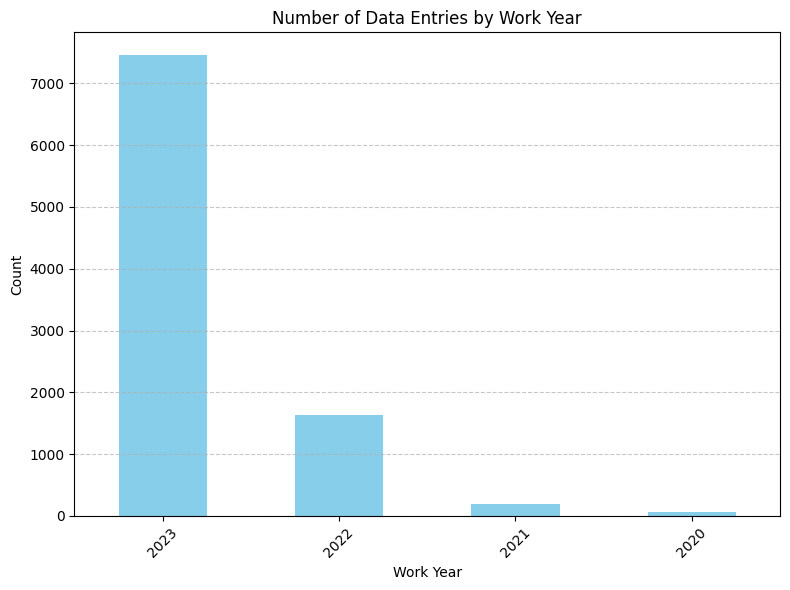

In [107]:
work_year_counts = data['work_year'].value_counts()

plt.figure(figsize=(8, 6))
work_year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Data Entries by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [108]:
data_2023 = data[data['work_year'] == 2023]

As u can see here the majority of the data is from 2023 and therefore it might be interesting to only look at the data from that year

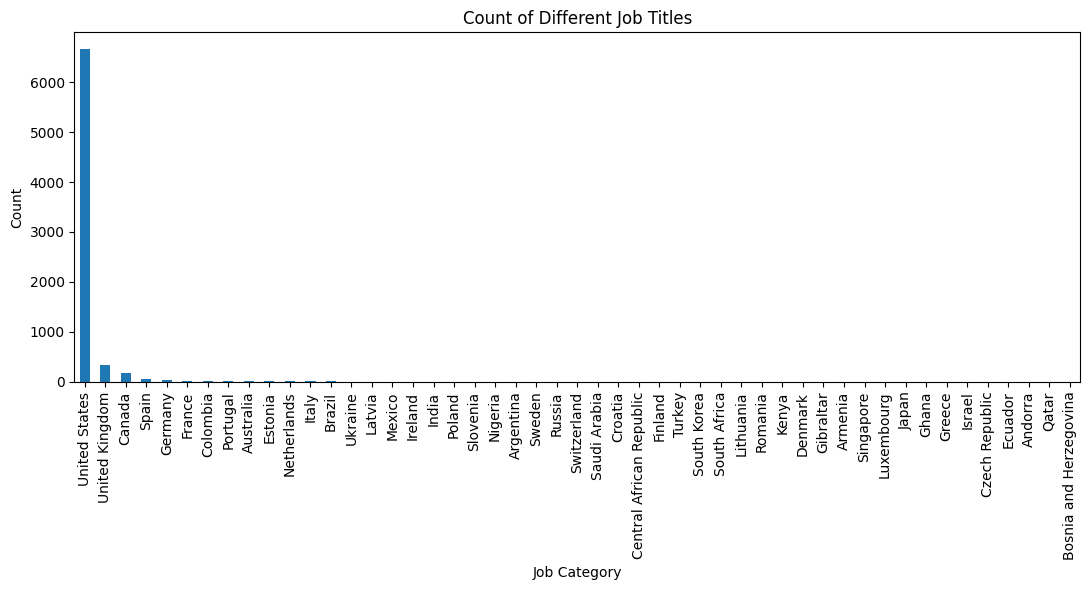

In [109]:
company_location = data_2023['company_location'].value_counts()
plt.figure(figsize=(11, 6))
company_location.plot(kind='bar')
plt.title('Count of Different Job Titles')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [110]:
top_5_countries = ["United States", "United Kingdom", "Canada", "Spain", "Germany"]
top_5_countries_data = data_2023[data_2023['company_location'].isin(top_5_countries)]

The majority of the data is also from companies in the us, uk, canada, spain and germany

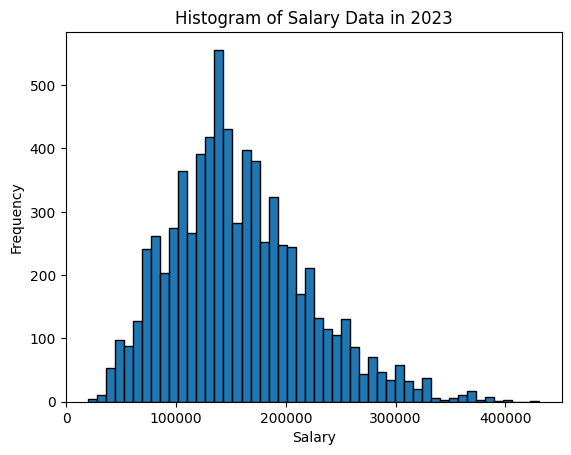

In [111]:
plt.hist(top_5_countries_data['salary_in_usd'], bins=50, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary Data in 2023')
plt.show()

<Axes: ylabel='salary_in_usd'>

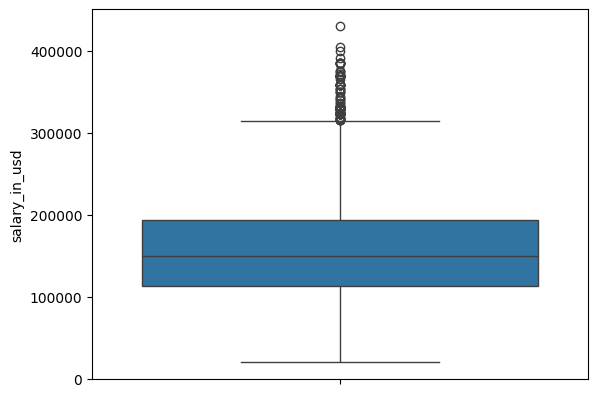

In [112]:
sns.boxplot(top_5_countries_data['salary_in_usd'])

Here we can see that we also have some outliers when it comes to higher end salaries

We can se that all the outliers are on the higher end above 300.000

In [113]:
data_filtered = top_5_countries_data[top_5_countries_data['salary_in_usd'] <= 300000]

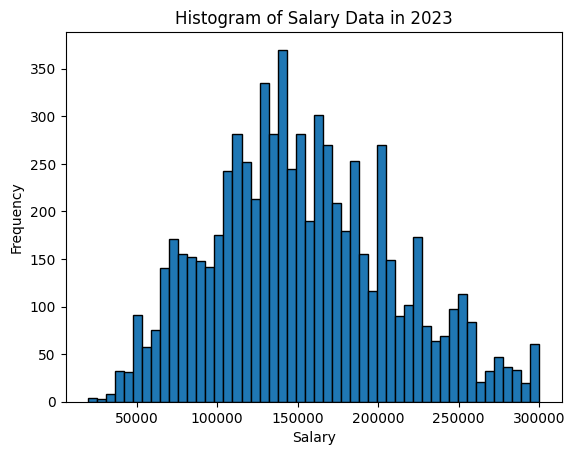

In [114]:
plt.hist(data_filtered['salary_in_usd'], bins=50, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary Data in 2023')
plt.show()

<Axes: ylabel='salary_in_usd'>

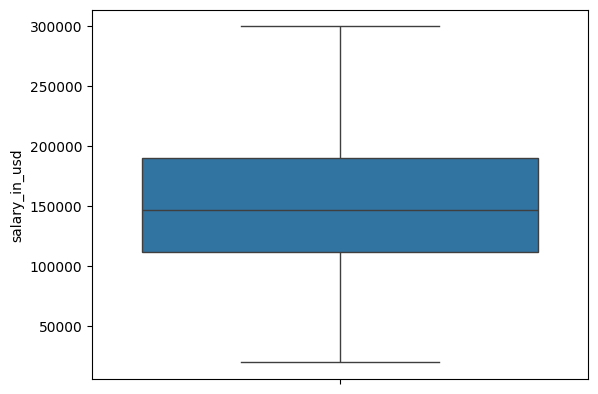

In [115]:
sns.boxplot(data_filtered['salary_in_usd'])

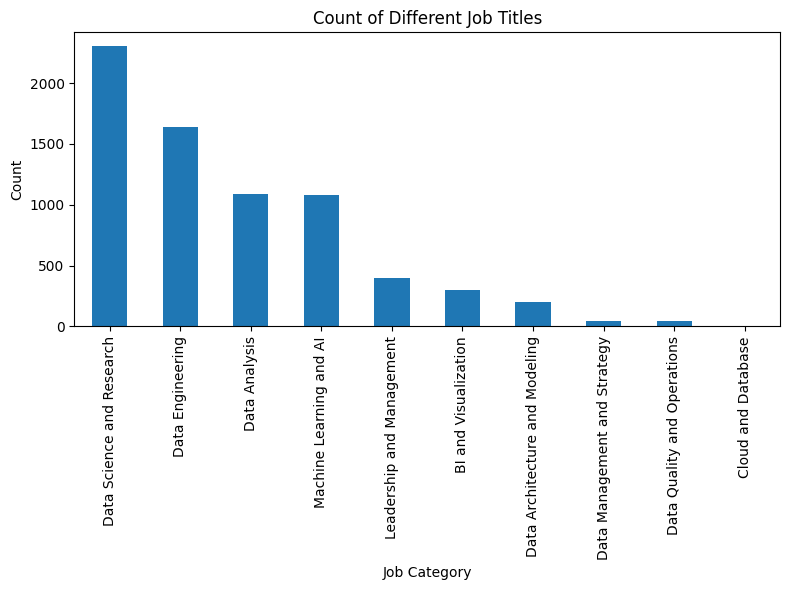

In [116]:
job_categories = data_filtered['job_category'].value_counts()
plt.figure(figsize=(8, 6))
job_categories.plot(kind='bar')
plt.title('Count of Different Job Titles')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

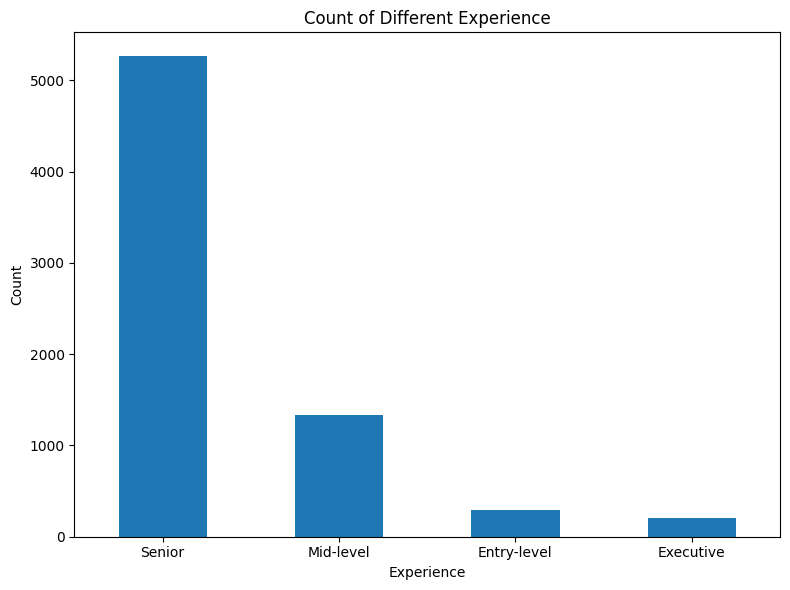

In [117]:
experience = data_filtered['experience_level'].value_counts()
plt.figure(figsize=(8, 6))
experience.plot(kind='bar')
plt.title('Count of Different Experience')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

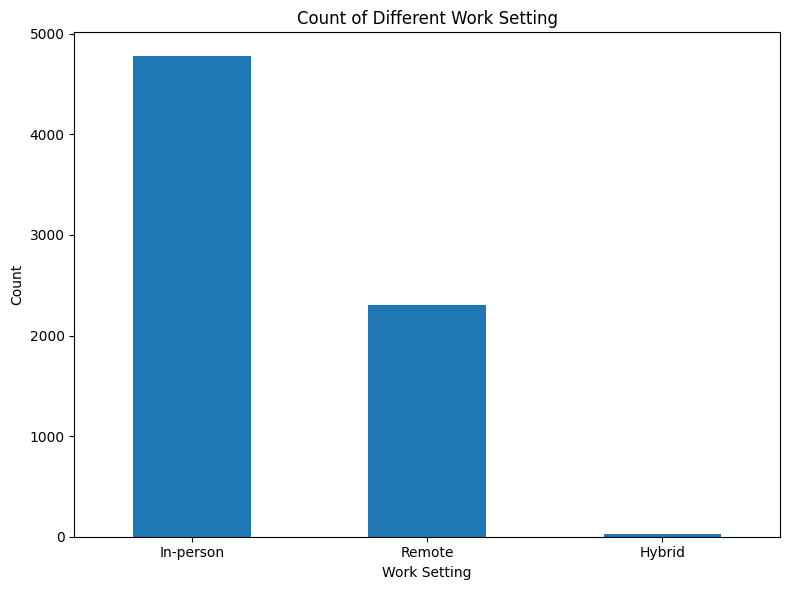

In [118]:
work_setting = data_filtered['work_setting'].value_counts()
plt.figure(figsize=(8, 6))
work_setting.plot(kind='bar')
plt.title('Count of Different Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

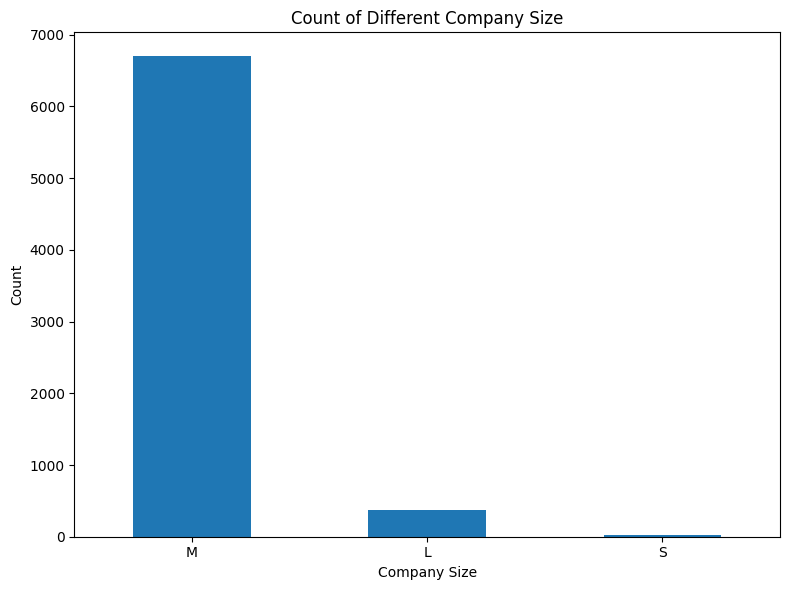

In [119]:
company_size = data_filtered['company_size'].value_counts()
plt.figure(figsize=(8, 6))
company_size.plot(kind='bar')
plt.title('Count of Different Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

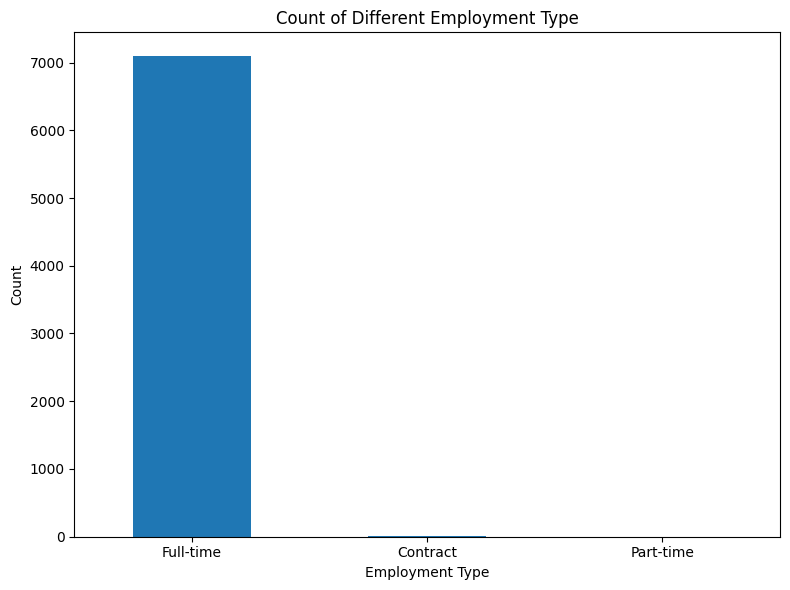

In [120]:
employment_type = data_filtered['employment_type'].value_counts()
plt.figure(figsize=(8, 6))
employment_type.plot(kind='bar')
plt.title('Count of Different Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

EXERCISE 2: Feature Engineering and Descriptive Statistics

Creating a new column income_level to easily tell if the salary is high compared to the rest other people working data science jobs

In [130]:
salary_bins = [0, 100000, 200000, 300000]
salary_labels = ["Low", "Middle", "High"]

data_filtered.loc[:, "income_level"] = pd.cut(data_filtered["salary_in_usd"], bins=salary_bins, labels=salary_labels, right=False)

data_filtered.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,income_level
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,Low
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,Middle
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,Low
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,High
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,Low


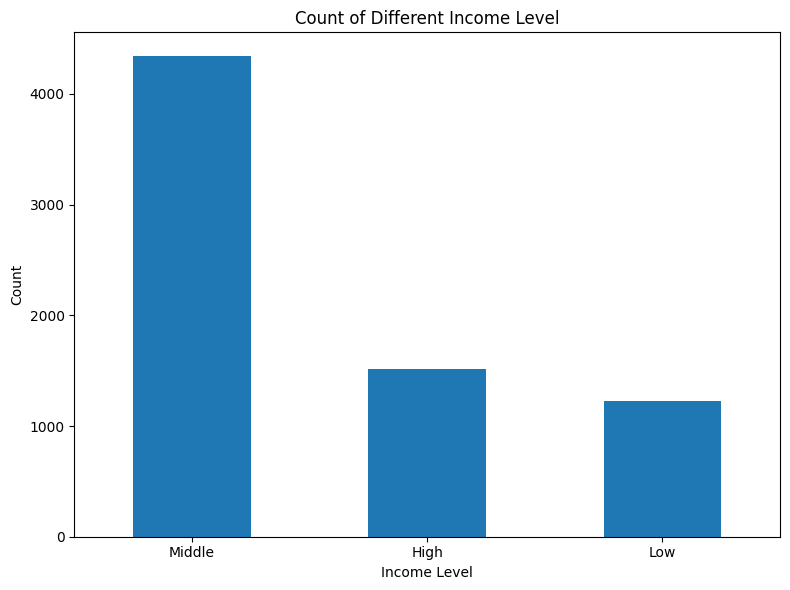

In [131]:
income_level = data_filtered['income_level'].value_counts()
plt.figure(figsize=(8, 6))
income_level.plot(kind='bar')
plt.title('Count of Different Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

One-hot enconding variable

Changing categorical variables into numerical ones so that it can be provided to machine learning algorithms.

In [122]:
data_encoded = pd.get_dummies(data_filtered, columns=["job_category"], prefix=["job_category"])

data_encoded.head()

,work_year,job_title,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,...,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI
0,2023,Data DevOps Engineer,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,...,False,False,False,False,True,False,False,False,False,False
1,2023,Data Architect,USD,186000,186000,United States,Senior,Full-time,In-person,United States,...,False,False,False,True,False,False,False,False,False,False
2,2023,Data Architect,USD,81800,81800,United States,Senior,Full-time,In-person,United States,...,False,False,False,True,False,False,False,False,False,False
3,2023,Data Scientist,USD,212000,212000,United States,Senior,Full-time,In-person,United States,...,False,False,False,False,False,False,False,True,False,False
4,2023,Data Scientist,USD,93300,93300,United States,Senior,Full-time,In-person,United States,...,False,False,False,False,False,False,False,True,False,False


Descriptive Statistics

In [123]:
mean_salary = data_filtered["salary"].mean()
mean_salary_in_usd = data_filtered["salary_in_usd"].mean()

median_salary = data_filtered["salary"].median()
median_salary_in_usd = data_filtered["salary_in_usd"].median()

std_salary = data_filtered["salary"].std()
std_salary_in_usd = data_filtered["salary_in_usd"].std()

print("Salary mean:", mean_salary)
print("Salary in usd mean:", mean_salary_in_usd)

print("Salary median:", median_salary)
print("Salary in usd median:", median_salary_in_usd)

print("Salary standard deviation:", std_salary)
print("Salary in usd standard deviation:", std_salary_in_usd)

Salary mean: 152231.42289818334
Salary in usd mean: 152761.7538374877
Salary median: 146100.0
Salary in usd median: 146600.0
Salary standard deviation: 56843.46885066218
Salary in usd standard deviation: 56270.164442551526


In [124]:
job_title_count = data_filtered["job_title"].value_counts()

salary_currency_count = data_filtered["salary_currency"].value_counts()

employee_residence_count = data_filtered["employee_residence"].value_counts()

experience_level_count = data_filtered["experience_level"].value_counts()

employment_type_count = data_filtered["employment_type"].value_counts()

work_setting_count = data_filtered["work_setting"].value_counts()

company_location_count = data_filtered["company_location"].value_counts()

company_size_count = data_filtered["company_size"].value_counts()

income_level_count = data_filtered["income_level"].value_counts()

print(job_title_count.head())
print(salary_currency_count.head())
print(employee_residence_count.head())
print(experience_level_count.head())
print(employment_type_count.head())
print(work_setting_count.head())
print(company_location_count.head())
print(company_size_count.head())
print(income_level_count.head())

job_title
Data Engineer                1608
Data Scientist               1482
Data Analyst                 1067
Machine Learning Engineer     803
Applied Scientist             245
Name: count, dtype: int64
salary_currency
USD    6766
GBP     236
EUR      85
CAD      14
Name: count, dtype: int64
employee_residence
United States     6481
United Kingdom     334
Canada             170
Spain               65
Germany             28
Name: count, dtype: int64
experience_level
Senior         5262
Mid-level      1336
Entry-level     296
Executive       207
Name: count, dtype: int64
employment_type
Full-time    7091
Contract        8
Part-time       2
Name: count, dtype: int64
work_setting
In-person    4776
Remote       2300
Hybrid         25
Name: count, dtype: int64
company_location
United States     6500
United Kingdom     335
Canada             172
Spain               65
Germany             29
Name: count, dtype: int64
company_size
M    6698
L     375
S      28
Name: count, dtype: int64
incom

Visualization

This part has already been done earlier to find outliers

EXERCISE 3: Data Wrangling and Analysis

Are Data Science jobs higher paid in the US?

In [125]:
us_avg_salary = data_filtered[data_filtered['company_location'] == 'United States']['salary_in_usd'].mean()

non_us_avg_salary = data_filtered[data_filtered['company_location'] != 'United States']['salary_in_usd'].mean()

print("Average salary for people in the US:", round(us_avg_salary, 2),"$")
print("Average salary for people not in the US:", round(non_us_avg_salary,2),"$")

Average salary for people in the US: 156289.99 $
Average salary for people not in the US: 114602.81 $


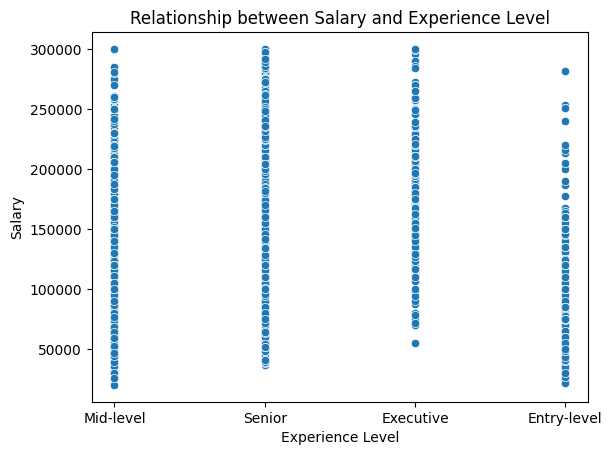

In [126]:
sns.scatterplot(data=data_filtered, x='experience_level', y='salary_in_usd')

plt.title('Relationship between Salary and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')

plt.show()

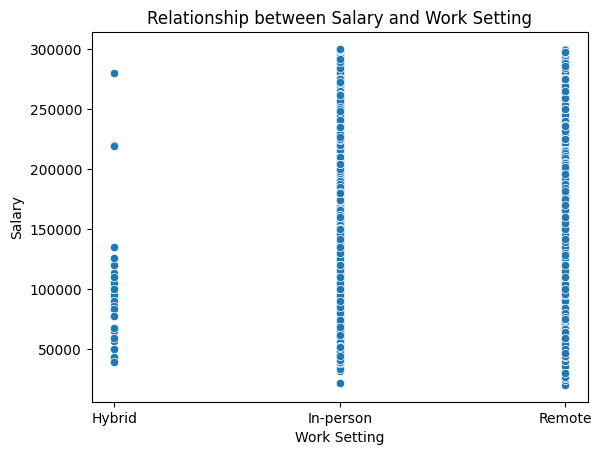

In [127]:
sns.scatterplot(data=data_filtered, x='work_setting', y='salary_in_usd')

plt.title('Relationship between Salary and Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary')

plt.show()

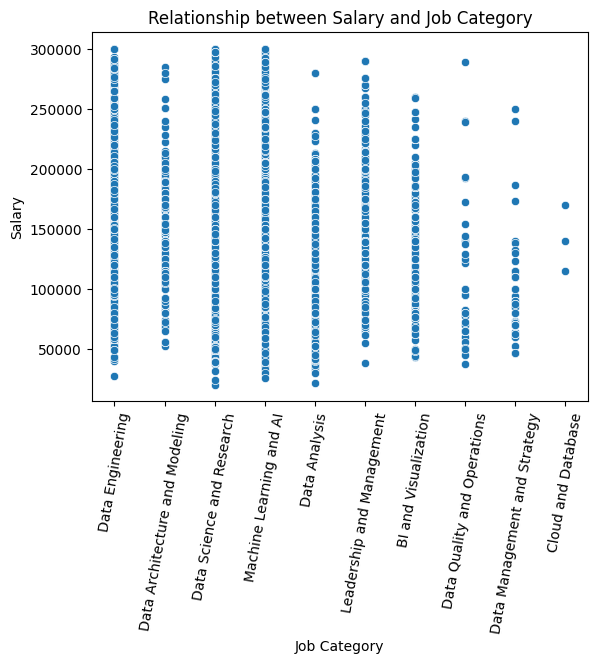

In [128]:
sns.scatterplot(data=data_filtered, x='job_category', y='salary_in_usd')

plt.title('Relationship between Salary and Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary')
plt.xticks(rotation=80)

plt.show()

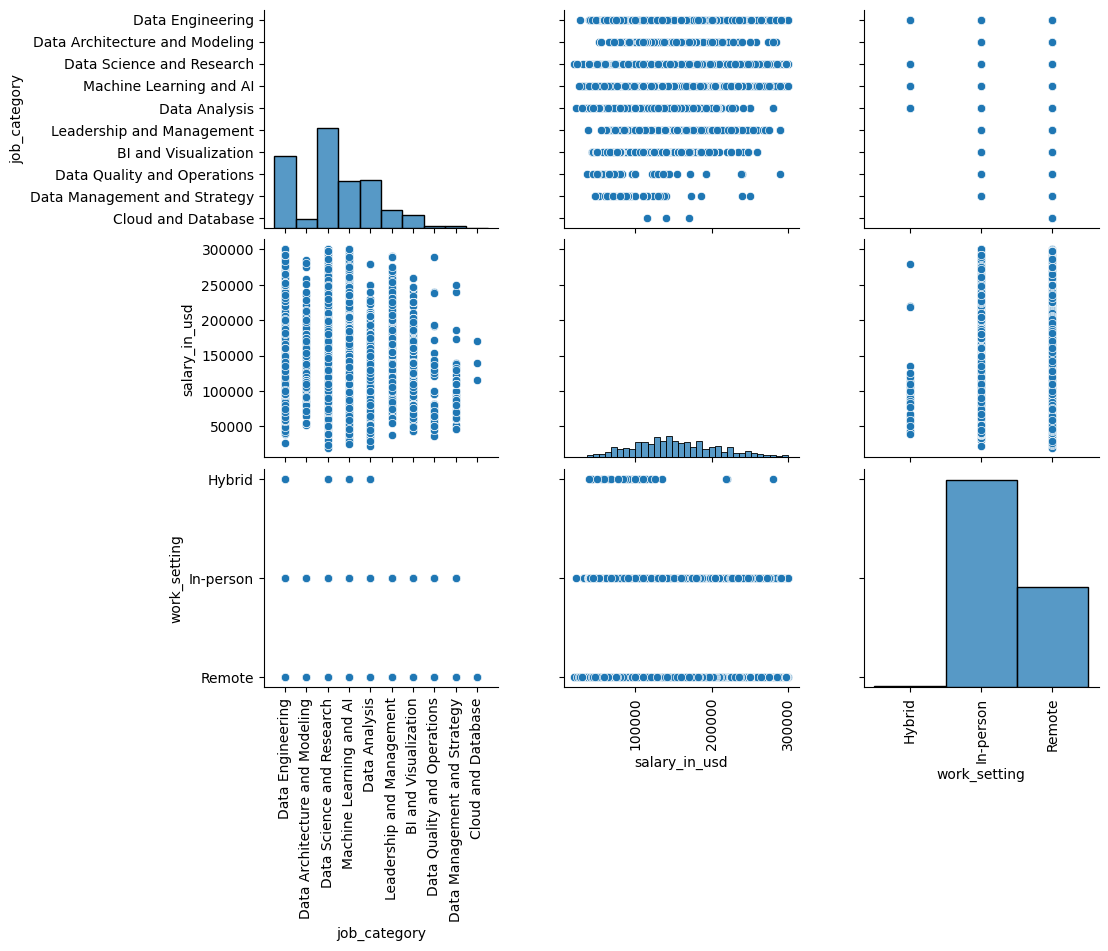

In [129]:
pair_plot = sns.pairplot(data=data_filtered, 
                         x_vars=['job_category','salary_in_usd','work_setting'], 
                         y_vars=['job_category','salary_in_usd','work_setting'], 
                         aspect=1.5)
for ax in pair_plot.axes.flatten():
    ax.xaxis.set_tick_params(rotation=90) 
plt.show()